# 1.Understanding the Data:

Import necessary libraries (e.g., pandas, matplotlib, seaborn).<br>
Load the COVID-19 dataset.<br>
Display basic information about the dataset (e.g., data types, missing values).<br>

In [10]:
# load required libraries/modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\Chandan\Desktop\ETLHIVE\Basic Python\Datasets\covid_19_data.csv")
df


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [12]:
# Display basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228326 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


# 2. Data Cleaning:

In [ ]:
Handle missing values.
Convert data types if necessary.
Check for duplicates.

In [24]:
# Handle missing values
for i in df.columns:
    if df[i].dtypes == "object":
        m = df[i].mode()
        df[i] = df[i].fillna(m)
        
df.isnull().sum()

# Convert data types if necessary ( ObservationDate    datetime64[ns]) change to datetime

df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

# Check for duplicates
print("Number of duplicates:", df.duplicated().sum())


Number of duplicates: 0


# 3. Descriptive Statistics:

Generate descriptive statistics (mean, median, min, max) for numeric columns.<br>
Explore summary statistics for categorical columns.

In [28]:
# Summary statistics for categorical columns
cat=[]
con=[]
for i in df:
    if df[i].dtypes=='object' :
        cat.append(i)
    else:
        con.append(i)
print(cat)
print(con)

['Province/State', 'Country/Region', 'Last Update']
['SNo', 'ObservationDate', 'Confirmed', 'Deaths', 'Recovered']


In [30]:
# Descriptive statistics
df.describe()

,SNo,ObservationDate,Confirmed,Deaths,Recovered
count,306429.000000,306429,3.064290e+05,306429.000000,3.064290e+05
mean,153215.000000,2020-11-06 01:54:54.146441728,8.567091e+04,2036.403268,5.042029e+04
min,1.000000,2020-01-22 00:00:00,-3.028440e+05,-178.000000,-8.544050e+05
25%,76608.000000,2020-07-30 00:00:00,1.042000e+03,13.000000,1.100000e+01
50%,153215.000000,2020-11-10 00:00:00,1.037500e+04,192.000000,1.751000e+03
75%,229822.000000,2021-02-18 00:00:00,5.075200e+04,1322.000000,2.027000e+04
max,306429.000000,2021-05-29 00:00:00,5.863138e+06,112385.000000,6.399531e+06
std,88458.577156,NaN,2.775516e+05,6410.938048,2.015124e+05


# 4. Time Series Analysis:

Analyze the trends in confirmed, deaths, and recovered cases over time.<br>
Create time-based visualizations.

<Axes: xlabel='ObservationDate', ylabel='Confirmed'>

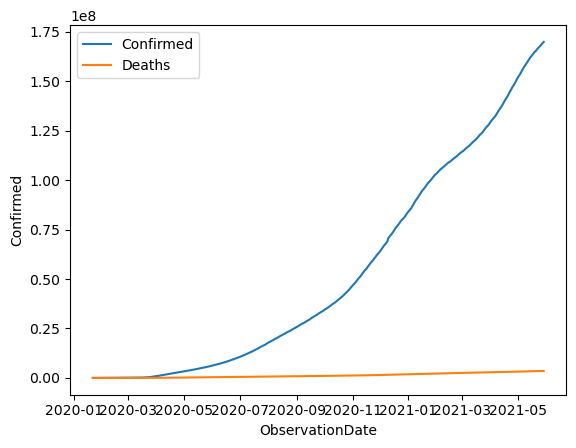

In [34]:
# Time series analysis
# groupby 'ObservationDate' and apply aggregation functions like sum on deaths,confirmed ,recovered 
df_time = df.groupby('ObservationDate').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})
df_time

# Plot time series data using line plot

# syntax: 
sns.lineplot(data=df_time, x='ObservationDate', y='Confirmed', label='Confirmed')
sns.lineplot(data=df_time, x='ObservationDate', y='Deaths', label='Deaths')




# 5. Geographical Analysis:

Analyze the distribution of cases across different countries/regions.<br>
Create geographical visualizations (e.g., world map).

<Axes: xlabel='Country/Region', ylabel='Confirmed'>

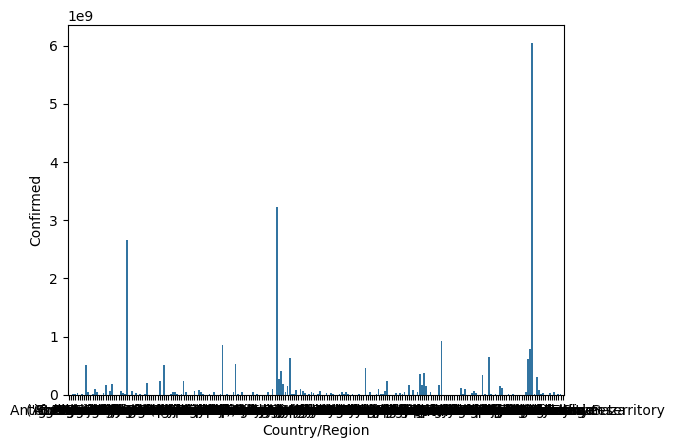

In [36]:
# Geographical analysis
df_country = df.groupby('Country/Region').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})

# Plot geographical data
sns.barplot(x=df_country.index, y='Confirmed', data=df_country)



# 6. Correlation Analysis:

Examine the correlation between different numeric variables.

<Axes: >

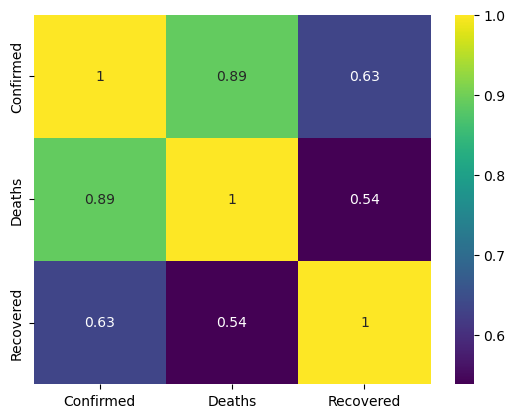

In [38]:
# Correlation analysis between confirmed,deaths and recovered

# Plot correlation on heat map
df.columns
correlation=df[['Confirmed', 'Deaths', 'Recovered']].corr()
sns.heatmap(correlation,annot=True,cmap='viridis')


# 7. Advanced Analysis:

Explore advanced visualizations or statistical tests based on the specific questions you want to answer.

In [40]:
# Calculate the total number of confirmed cases, deaths, and recoveries for each country/region.
total_confirmed=df['Confirmed'].groupby(by=df['Country/Region']).sum()
total_recovered=df['Recovered'].groupby(by=df['Country/Region']).sum()
total_deaths=df['Deaths'].groupby(by=df['Country/Region']).sum()


In [42]:
# Identify the countries/regions with the highest number of confirmed cases, deaths, and recoveries.
a=df.groupby('Country/Region').agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum'})
cf=a.sort_values(by='Confirmed',ascending=False)
dt=a.sort_values(by='Deaths',ascending=False)
rc=a.sort_values(by='Recovered',ascending=False)
cf.head(1)#highestnoofconfirmed
dt.head(1)#highestnoofdeaths
rc.head(1)#highestnoofrecovered

,Confirmed,Deaths,Recovered
Country/Region,,,
India,3.226768e+09,44424723.0,2.900590e+09


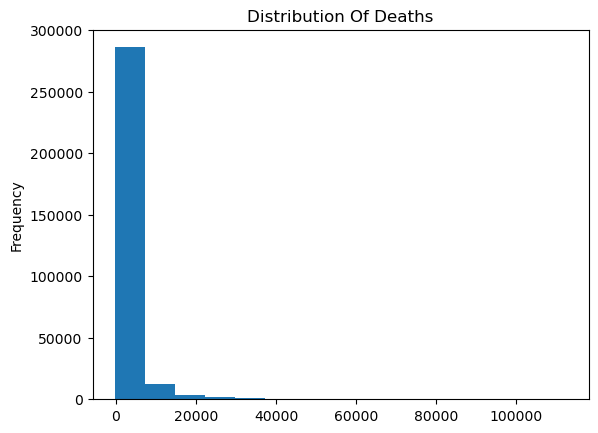

In [46]:
# Visualize the distribution of deaths using bar chart
plt.hist(df['Deaths'],bins=15)
plt.title('Distribution Of Deaths')
plt.ylabel('Frequency')
plt.show()